In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier 
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day1/Glass.csv")
le = LabelEncoder()
y = le.fit_transform(df["Type"])
X = df.drop("Type", axis = 1)
le.classes_

array(['building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'headlamps',
       'tableware', 'vehicle_windows_float_processed'], dtype=object)

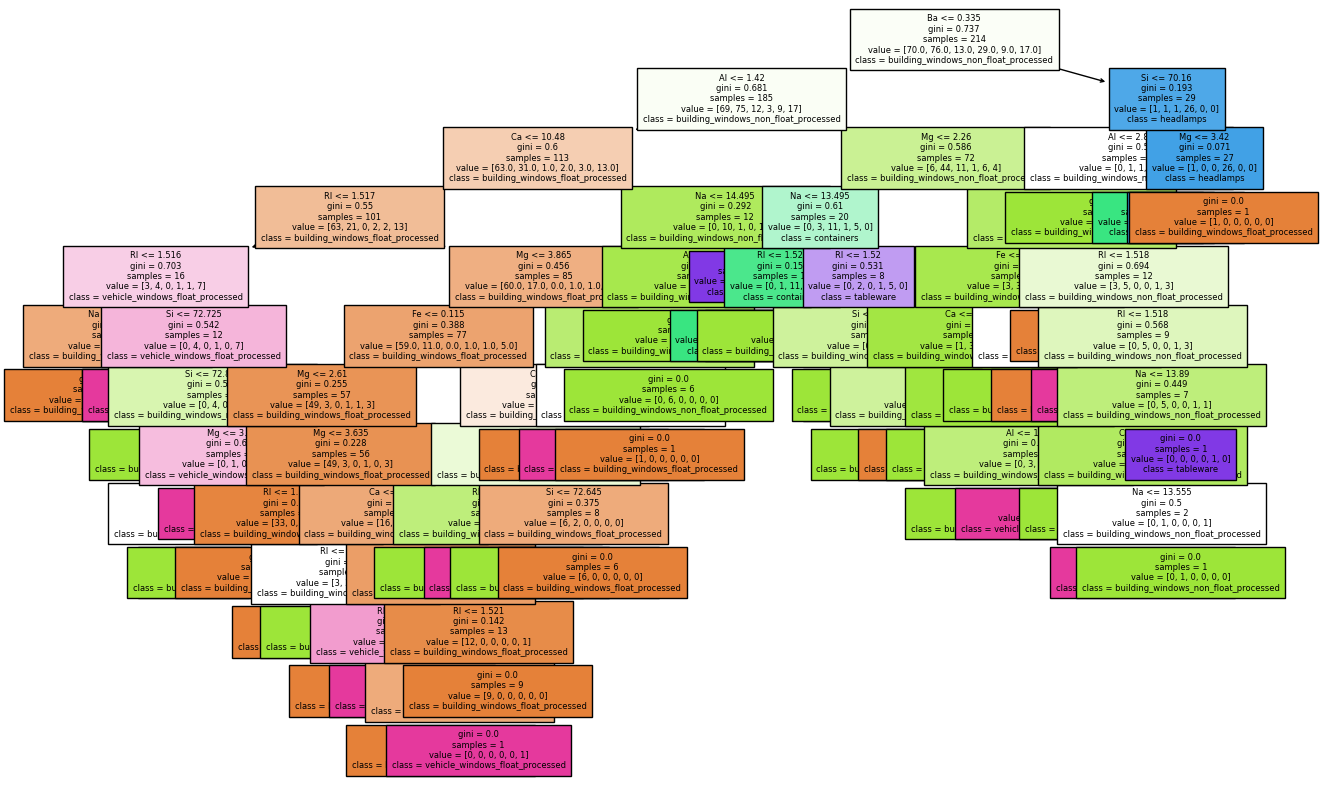

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

#plotting tree
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'headlamps',
       'tableware', 'vehicle_windows_float_processed'],
               filled=True,fontsize=6);

In [12]:
#gridsearch to find best max_depth, min_samples_leaf, min_samples_split
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=24)

params = { 'min_samples_split' : [2, 4, 6, 10 ,20], 'min_samples_leaf':[1, 5, 10, 15], 'max_depth': [None, 4, 3, 2]}
gcv = GridSearchCV(dtc, param_grid = params, cv = kfold, scoring = 'neg_log_loss')
gcv.fit(X, y)
print(gcv.best_score_)
print(gcv.best_params_)

-1.861576176338518
{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 4}


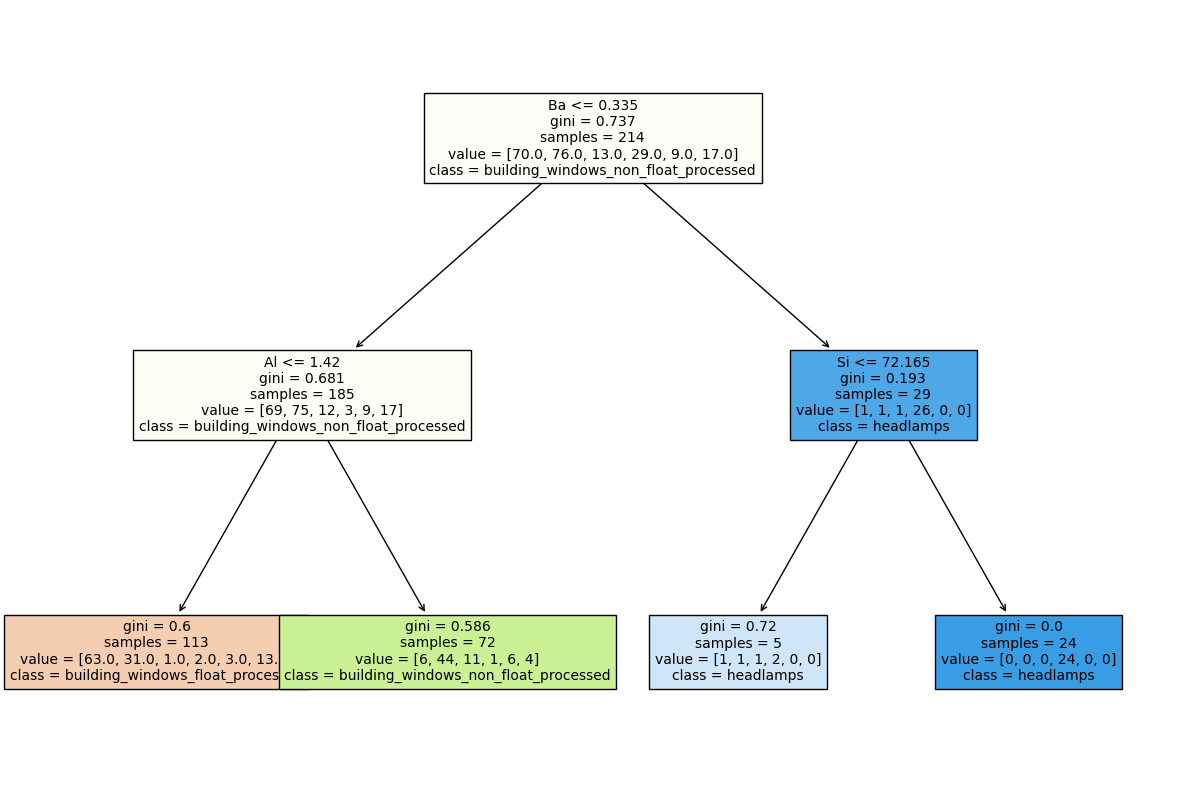

In [18]:
#plotting best tree 
best_tree = gcv.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['building_windows_float_processed',
       'building_windows_non_float_processed', 'containers', 'headlamps',
       'tableware', 'vehicle_windows_float_processed'],
               filled=True,fontsize=10);

In [27]:
tst_conc = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day 5/tst_Glass.csv")
pred_glass = gcv.predict(tst_conc)
pred_glass

array([3, 0, 3, 3, 3, 3])

In [28]:
pred_type = le.inverse_transform(pred_glass)
pred_type

array(['headlamps', 'building_windows_float_processed', 'headlamps',
       'headlamps', 'headlamps', 'headlamps'], dtype=object)

In [39]:
#feature importance
print(best_tree.feature_importances_)

[0.         0.         0.         0.36461713 0.04502146 0.
 0.         0.59036141 0.        ]


In [25]:
df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance':best_tree.feature_importances_})
df_imp

,Feature,Importance
0,RI,0.000000
1,Na,0.000000
2,Mg,0.000000
3,Al,0.364617
4,Si,0.045021
5,K,0.000000
6,Ca,0.000000
7,Ba,0.590361
8,Fe,0.000000


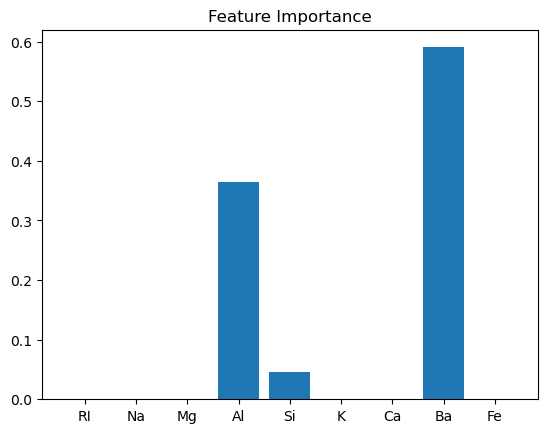

In [26]:
#plotting feature importance
plt.bar(df_imp['Feature'],
       df_imp['Importance'])
plt.title("Feature Importance")
plt.show()

In [35]:
m_left, m_right = 183,31
g_left, g_right = 0.679, 0.287
m=214

In [37]:

ba_split = (m_left/m)*g_left + (m_right/m)*g_right
ba_split
a12

0.6222149532710282